# Speech-to-Text RNNT web inference using Gradio

Encoder model + RNNT loss web inference using Gradio

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/stt-transducer-gradio](https://github.com/huseinzol05/malaya-speech/tree/master/example/stt-transducer-gradio).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline

### List available RNNT model

In [2]:
malaya_speech.stt.available_transducer()

,Size (MB),Quantized Size (MB),WER,CER,WER-LM,CER-LM,Language
tiny-conformer,24.4,9.14,0.212811,0.0813687,0.199683,0.0770037,[malay]
small-conformer,49.2,18.1,0.198533,0.0744953,0.185361,0.0711431,[malay]
conformer,125,37.1,0.163602,0.0587443,0.156182,0.0571897,[malay]
large-conformer,404,107,0.156684,0.0619715,0.148622,0.0590102,[malay]
conformer-stack-2mixed,130,38.5,0.137672,0.0717507,None,None,"[malay, singlish]"
conformer-stack-3mixed,130,38.5,0.277588,0.163121,None,None,"[malay, singlish, mandarin]"
small-conformer-singlish,49.2,18.1,0.12771,0.0703953,None,None,[singlish]
conformer-singlish,125,37.1,0.0963391,0.0545533,None,None,[singlish]
large-conformer-singlish,404,107,0.0839525,0.0445617,None,None,[singlish]


Lower is better. Mixed models tested on different dataset.

### Load RNNT model

```python
def deep_transducer(
    model: str = 'conformer', quantized: bool = False, **kwargs
):
    """
    Load Encoder-Transducer ASR model.

    Parameters
    ----------
    model : str, optional (default='conformer')
        Model architecture supported. Allowed values:

        * ``'tiny-conformer'`` - TINY size Google Conformer.
        * ``'small-conformer'`` - SMALL size Google Conformer.
        * ``'conformer'`` - BASE size Google Conformer.
        * ``'large-conformer'`` - LARGE size Google Conformer.
        * ``'conformer-stack-2mixed'`` - BASE size Stacked Google Conformer for (Malay + Singlish) languages.
        * ``'conformer-stack-3mixed'`` - BASE size Stacked Google Conformer for (Malay + Singlish + Mandarin) languages.
        * ``'small-conformer-singlish'`` - SMALL size Google Conformer for singlish language.
        * ``'conformer-singlish'`` - BASE size Google Conformer for singlish language.
        * ``'large-conformer-singlish'`` - LARGE size Google Conformer for singlish language.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya_speech.model.tf.Transducer class
    """
```

In [4]:
model = malaya_speech.stt.deep_transducer(model = 'conformer')

### web inference using Gradio

```python
def gradio(self, record_mode: bool = True, **kwargs):
    """
    Transcribe an input using beam decoder on Gradio interface.

    Parameters
    ----------
    record_mode: bool, optional (default=True)
        if True, Gradio will use record mode, else, file upload mode.

    **kwargs: keyword arguments for beam decoder and `iface.launch`.
    """
```

#### record mode

In [6]:
model.gradio(record_mode = True)

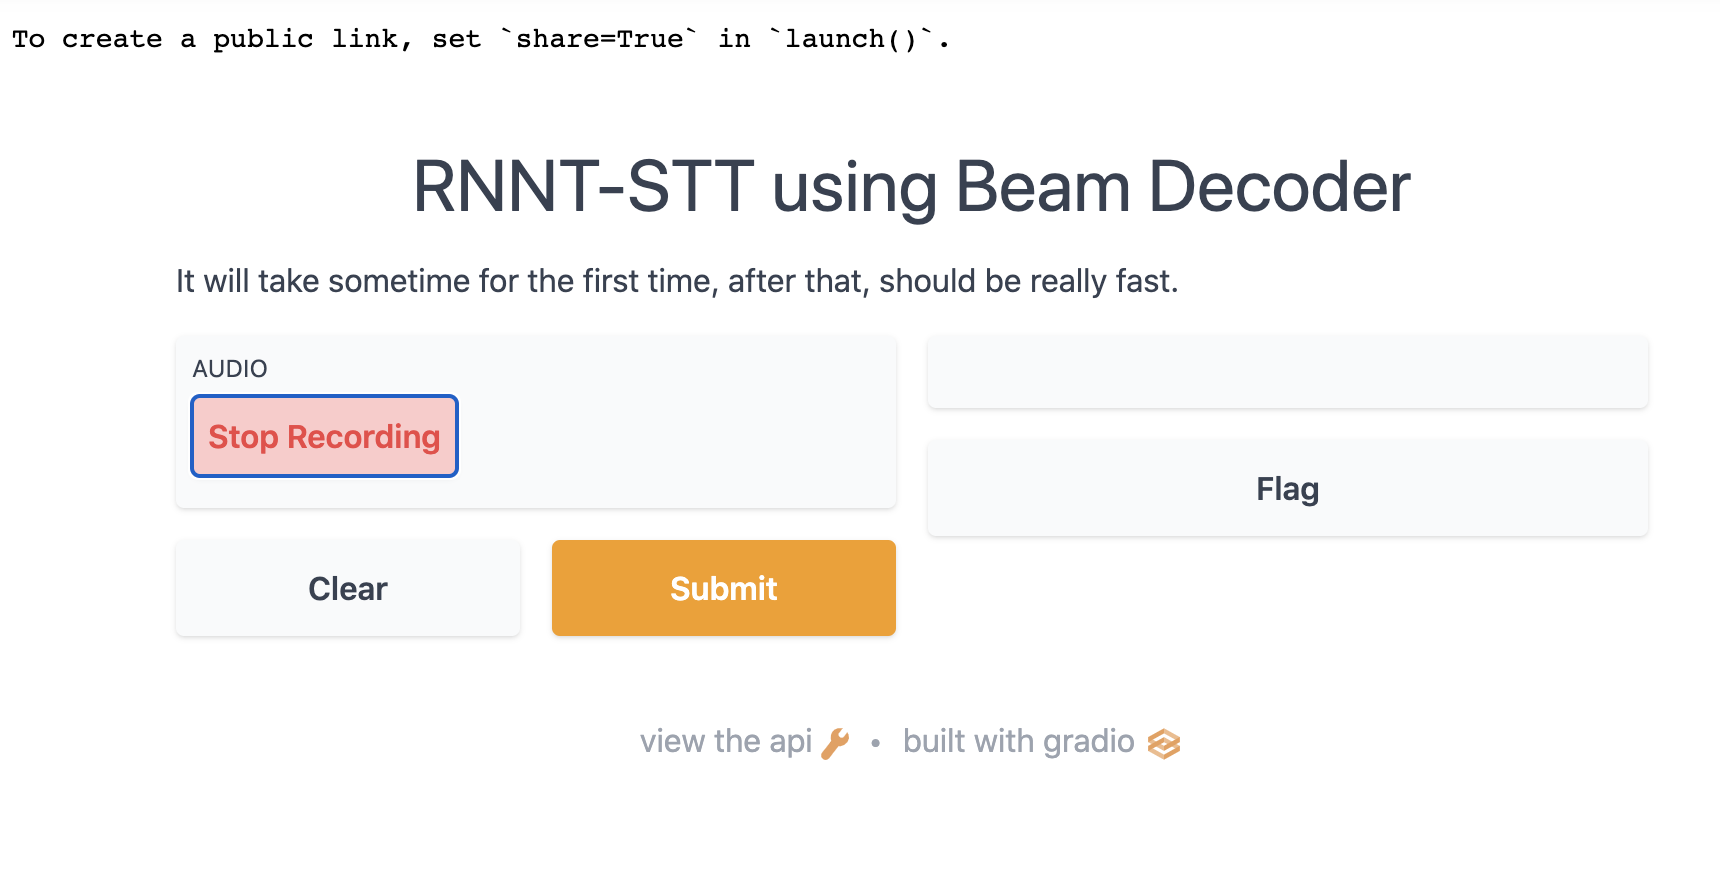

In [10]:
from IPython.core.display import Image, display

display(Image('record-mode.png', width=800))

#### upload mode

In [9]:
model.gradio(record_mode = False)

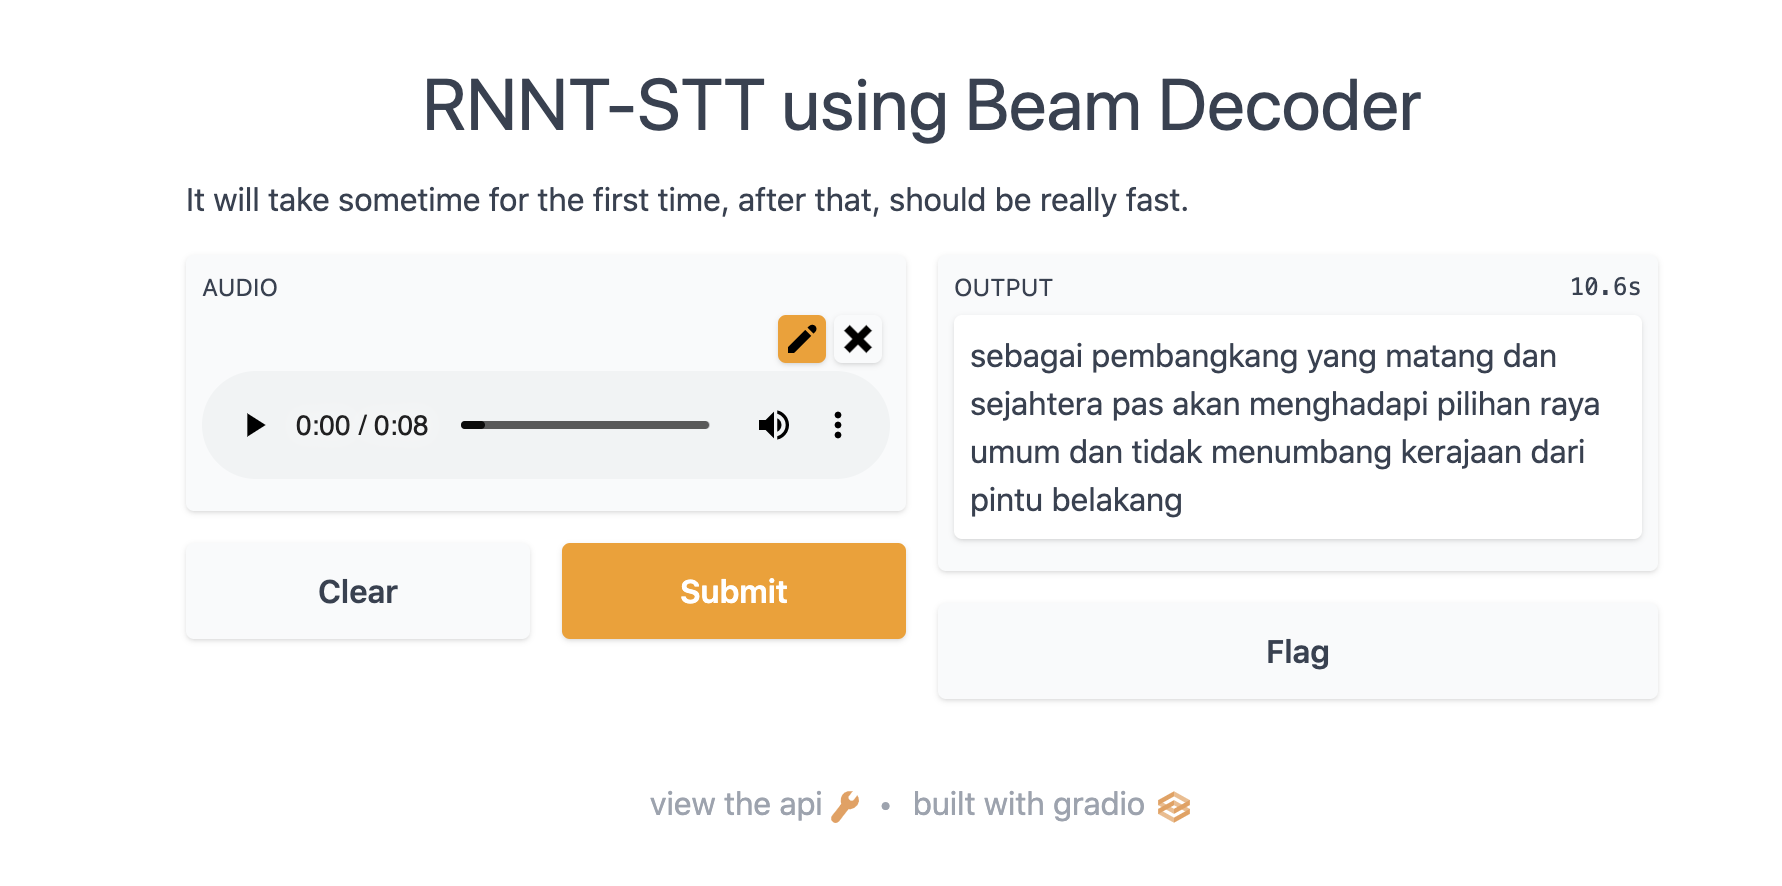

In [11]:
from IPython.core.display import Image, display

display(Image('upload-mode.png', width=800))